<a href="https://colab.research.google.com/github/adenikeadewumi/EEE_254/blob/main/studentperformance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Student Performance in Exams Prediction

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df= pd.read_csv("StudentsPerformance.csv")

In [38]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


array([[<Axes: title={'center': 'math score'}>,
        <Axes: title={'center': 'reading score'}>],
       [<Axes: title={'center': 'writing score'}>, <Axes: >]],
      dtype=object)

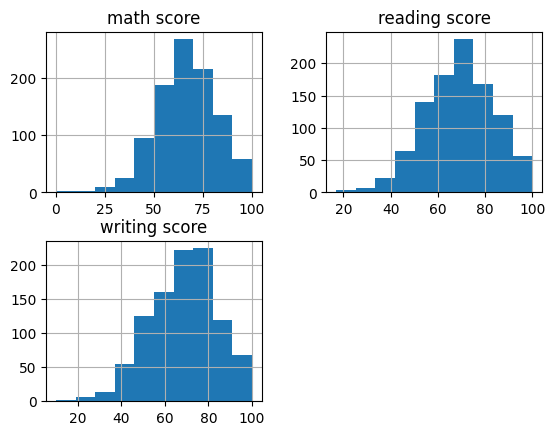

In [39]:
df.hist()#Plot the histogram of math, reading and writing score

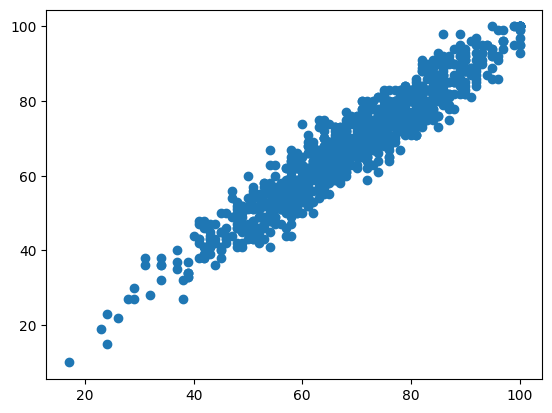

In [40]:
plt.scatter(df["reading score"], df["writing score"]) # This shows the strong linear relationship between reading and writing scores


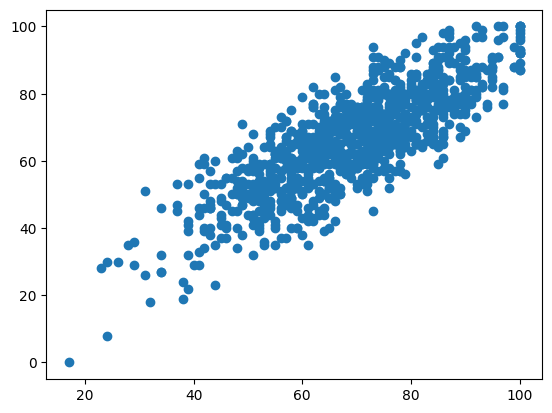

In [41]:
plt.scatter(df["reading score"], df["math score"]) #Both plots on math shows an higher variance as the points are not closely packed


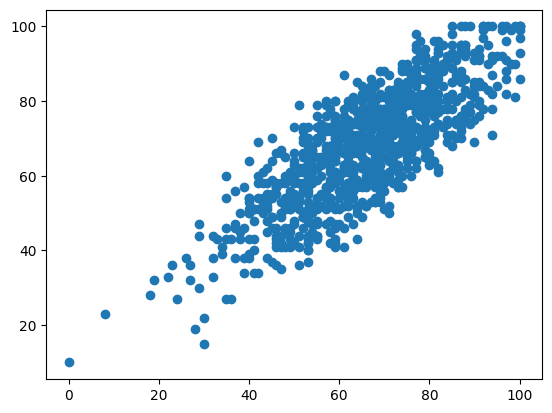

In [42]:
plt.scatter(df["math score"], df["writing score"])

In [43]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [44]:
df.info()#No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [45]:
#Define a function to classify the grades to 0-Excellent 1-Good 2- Pass 3- Fail
def f(x):
    if x>70:
        return 0
    elif x>60:
        return 1
    elif x>40:
        return 2
    else:
        return 3

In [46]:
df["math score"]= df["math score"].apply(f)

In [47]:
df["reading score"]= df["reading score"].apply(f)

In [48]:
df["writing score"]= df["writing score"].apply(f)


In [49]:
#Convert all classification data to numeric classes for easy classification if data will be used to train a model
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
df["test preparation course"]= l.fit_transform(df["test preparation course"])
df["gender"]= l.fit_transform(df["gender"])
df["parental level of education"]= l.fit_transform(df["parental level of education"])
df["lunch"]= l.fit_transform(df["lunch"])
df["race/ethnicity"]= l.fit_transform(df["race/ethnicity"])


In [50]:
#Visualize new data
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,0,0,0
1,0,2,4,1,0,1,0,0
2,0,1,3,1,1,0,0,0
3,1,0,0,0,1,2,2,2
4,1,2,4,1,1,0,0,0


In [51]:
#We can now plot the correlation between all the data features
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
gender,1.000000,-0.001502,0.001913,0.021372,-0.006028,-0.153681,0.214012,0.269201
race/ethnicity,-0.001502,1.000000,-0.031946,0.046563,-0.017508,-0.198760,-0.143066,-0.156946
parental level of education,0.001913,-0.031946,1.000000,0.006320,-0.023968,0.041374,0.073524,0.067906
lunch,0.021372,0.046563,0.006320,1.000000,0.017044,-0.311238,-0.217679,-0.244243
test preparation course,-0.006028,-0.017508,-0.023968,0.017044,1.000000,0.145163,0.219810,0.276502
math score,-0.153681,-0.198760,0.041374,-0.311238,0.145163,1.000000,0.715511,0.704872
reading score,0.214012,-0.143066,0.073524,-0.217679,0.219810,0.715511,1.000000,0.887483
writing score,0.269201,-0.156946,0.067906,-0.244243,0.276502,0.704872,0.887483,1.000000


From the correlation above, it can be seen that reading skills are very paramount for the success of students. Reading score has the highest correlation with the other tests and with the parent's education level as well
Writing and reading skill are very dependant on each other. To be a good writer you must be a good reader as well
Also, math doesn't realy depend on the parent's education status but more on preparation level and reading techniques


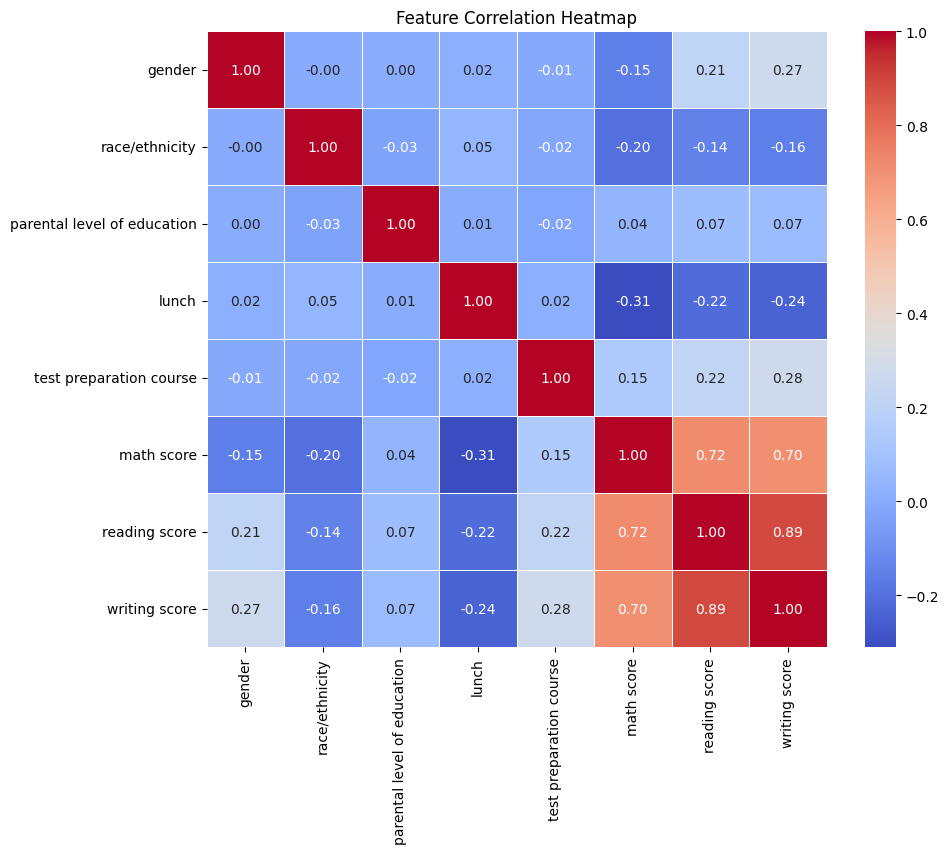

In [55]:
#Heatmap for better visualization of level of importance of the features
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()
